In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CellSim
from os import path

In [2]:
#download the simulator
if not path.exists("CellSim.py"):
    !wget https://users.itk.ppke.hu/~horan/cnn/CellSim.py
#download the labirinth image and initial points
if not path.exists("inputs/Lab.npy"):
    !wget https://users.itk.ppke.hu/~horan/cnn/Lab.npy -P ./inputs/
if not path.exists("inputs/LabInit.npy"):
    !wget https://users.itk.ppke.hu/~horan/cnn/LabInit.npy -P ./inputs/

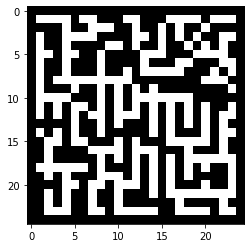

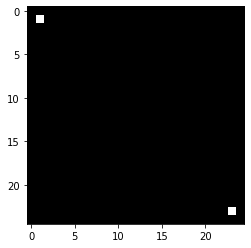

In [3]:
Lab=np.load('inputs/Lab.npy') # labiritus ami az első ábrán van
plt.imshow(Lab, cmap='Greys') 
Init=np.load('inputs/LabInit.npy') # 2 pont ami a második ábrán van, ezek között keressük az összes útvonalat
plt.figure()
plt.imshow(Init, cmap='Greys')

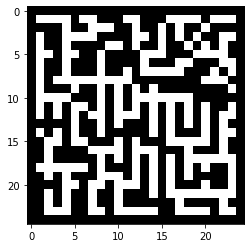

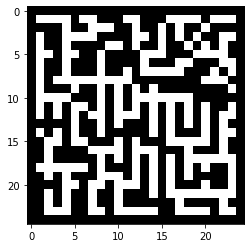

In [4]:
#Iterative solution
CNN=CellSim.CellSim() #intialization of the simulator

CNN.SetTimeStep(0.1) #setting the timestep of the numerical solution
CNN.SetSimTime(3.0) #setting the running time of the simulation

CNN.Input=Lab #loading the input image
CNN.State=np.zeros_like(Lab) #loading the initial state
CNN.Boundary='ZeroFlux'  #setting the  Boundary condition
for i in range(25):
    # végpontok törlése (endeater template)
    CNN.SetA([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])
    CNN.SetB([[0.0, 1.0, 0.0], [1.0, 9.0, 1.0], [0.0, 1.0, 0.0]])
    CNN.SetZ = 8.0 # vagy sima értékadással is lehet: CNN.Z = 0.0
    OutImg = CNN.Simulate()

    # kiindulópontok visszahelyezése: logand template
    CNN.Input=Init #loading the input image
    CNN.State=OutImg #loading the initial state
    CNN.SetA([[0.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 0.0]])
    CNN.SetB([[0.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 0.0]])
    CNN.SetZ = -1.0
    OutImg = CNN.Simulate()
    CNN.Input=OutImg
    CNN.State=np.zeros_like(Lab)

plt.imshow(Lab, cmap='Greys')
plt.figure()
plt.imshow(OutImg, cmap='Greys') #displaying the output image

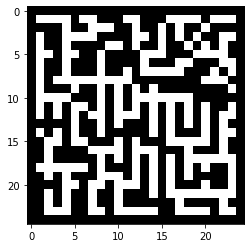

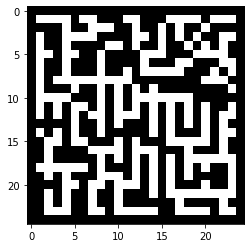

In [5]:
#Continuous solution
CNN=CellSim.CellSim() #intialization of the simulator
CNN.SetTimeStep(0.1) #setting the timestep of the numerical solution
CNN.SetSimTime(5.0) #setting the running time of the simulation
CNN.Input=Init #loading the input image
CNN.State=Lab #loading the initial state
CNN.Boundary='ZeroFlux'  #setting the  Boundary condition

CNN.SetA([[0.0, 0.1, 0.0], [1.0, 9.0, 1.0], [0.0, 1.0, 0.0]])
CNN.SetB([[0.0, 0.0, 0.0], [0.0, 8.0, 0.0], [0.0, 0.0, 0.0]])
CNN.SetZ = 8.0

OutImg=CNN.Simulate() #executing the simulation, the function returns the output image of the CeNN array
plt.imshow(Lab, cmap='Greys') #displaying the input image
plt.figure()
plt.imshow(OutImg, cmap='Greys') #displaying the output image